# Homework no.4 Machine Learning
**Student Name:** Mohammad Amin Dadgar <br>
**Student Id:** 4003624016

In [42]:
## importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Q1
Using MNIST dataset implement multi-layer neural networks and report the accuracy of the classification with requested properties.
- Train a neural network with 1, 2 and 3 layers.
- Use different neuron counts in each layer, ex: 16, 32, 64
- Use `mse` and `cross_entropy` for loss function.
- Use the activation functions `relu`, `tanh` and `sigmoid`.

## Answer

### Loading the MNIST dataset

In [2]:
## Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [17]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
y_train_binray_vec = keras.utils.to_categorical(y_train)
y_test_binray_vec = keras.utils.to_categorical(y_test)

y_train_binray_vec[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Creating one layer network with Fully Connected layer

In [58]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(input_shape,)))


model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


The parameters are calculated as `28*28*13 + 13`, which 13 is our bias count.

In [59]:
## reshape the images because we are going to use them as an input of a dense layer
x_train_reshaped = tf.reshape(x_train, (x_train.shape[0], input_shape))
x_test_reshaped = tf.reshape(x_test, (x_test.shape[0], input_shape))

x_train_reshaped.shape, x_test_reshaped.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

In [61]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_one_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.4950 - accuracy: 0.8921 - val_loss: 2.5711 - val_accuracy: 0.8965
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 2.5098 - accuracy: 0.8911 - val_loss: 2.5870 - val_accuracy: 0.8928
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 2.4593 - accuracy: 0.8930 - val_loss: 3.0469 - val_accuracy: 0.8945
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3475 - accuracy: 0.8934 - val_loss: 2.6333 - val_accuracy: 0.8992
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3496 - accuracy: 0.8925 - val_loss: 2.3867 - val_accuracy: 0.9040
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3183 - accuracy: 0.8947 - val_loss: 2.4677 - val_accuracy: 0.9023
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 2.3999 - accuracy: 0.8930 - val_loss: 2.7233 - val_accuracy: 0.8983
Epoch 

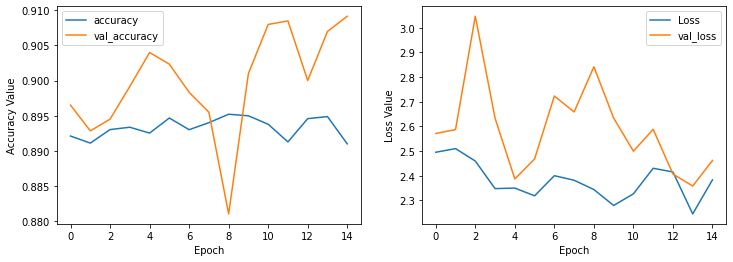

In [96]:
## plotting the train history
# plt.plot(history_one_layer)

def plot_history(history):
    """
    Plot the Losses and Accuracies of training history
    
    Parameters:
    ------------
    history : dictionary
        the history of training returned by mode.fit in tensorflow neural network
        
    """

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    axes[0].plot(history.history['accuracy'])
    axes[0].plot(history.history['val_accuracy'])
    axes[0].legend(['accuracy', 'val_accuracy'])
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy Value')

    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].legend(['Loss', 'val_loss'])
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss Value')

    plt.show()
    
plot_history(history_one_layer)

### Creating two layer network with Fully Connected layer

In [72]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [73]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_two_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 4.8503 - accuracy: 0.8620 - val_loss: 1.0899 - val_accuracy: 0.9157
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.7532 - accuracy: 0.9046 - val_loss: 0.5583 - val_accuracy: 0.9060
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.9221 - val_loss: 0.4070 - val_accuracy: 0.9285
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2786 - accuracy: 0.9380 - val_loss: 0.3531 - val_accuracy: 0.9388
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2140 - accuracy: 0.9486 - val_loss: 0.3395 - val_accuracy: 0.9420
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1769 - accuracy: 0.9564 - val_loss: 0.3007 - val_accuracy: 0.9450
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1604 - accuracy: 0.9594 - val_loss: 0.2821 - val_accuracy: 0.9483
Epoch 

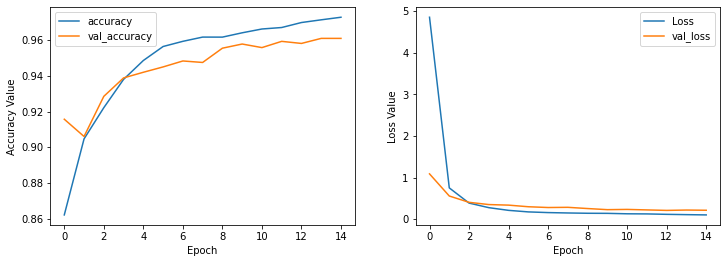

In [97]:
plot_history(history_two_layer)

### Creating a three layer network with Fully Connected layer


In [81]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='relu', ))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [82]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.7456 - accuracy: 0.8495 - val_loss: 0.6261 - val_accuracy: 0.9173
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4747 - accuracy: 0.9233 - val_loss: 0.3464 - val_accuracy: 0.9427
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2718 - accuracy: 0.9432 - val_loss: 0.2914 - val_accuracy: 0.9453
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9556 - val_loss: 0.2557 - val_accuracy: 0.9495
Epoch 5/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1514 - accuracy: 0.9618 - val_loss: 0.2171 - val_accuracy: 0.9575
Epoch 6/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1296 - accuracy: 0.9657 - val_loss: 0.2458 - val_accuracy: 0.9578
Epoch 7/15
422/422 [==============================] - 1s 4ms/step - loss: 0.1150 - accuracy: 0.9697 - val_loss: 0.2395 - val_accuracy: 0.9592
Epoch 

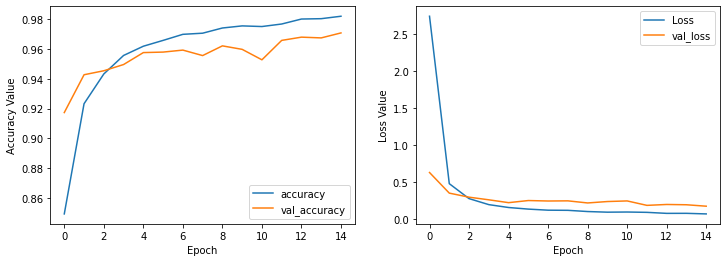

In [98]:
plot_history(history_three_layer)

Let's see how `softmax` activation function works in our three layer network.(If we apply `softmax` function on all the layers)

In [84]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='softmax', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='softmax', ))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               100480    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [85]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer_softmax_applied = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.2584 - accuracy: 0.2709 - val_loss: 2.1583 - val_accuracy: 0.6877
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 1.9198 - accuracy: 0.6935 - val_loss: 1.5972 - val_accuracy: 0.7358
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 1.3641 - accuracy: 0.7059 - val_loss: 1.0940 - val_accuracy: 0.7348
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 1.0376 - accuracy: 0.7140 - val_loss: 0.9237 - val_accuracy: 0.7332
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.9187 - accuracy: 0.7205 - val_loss: 0.9217 - val_accuracy: 0.7102
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8659 - accuracy: 0.7214 - val_loss: 0.8921 - val_accuracy: 0.7103
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8235 - accuracy: 0.7226 - val_loss: 0.7432 - val_accuracy: 0.7385
Epoch 

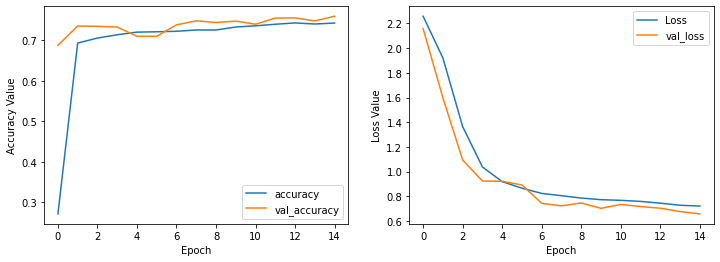

In [99]:
plot_history(history_three_layer_softmax_applied)

We can see that using the `softmax` activation function for all layers can achieve much better performance than before, And we can conclude that the `softmax` activation function can represent and save the pixels information way better than `relu`.

Let's apply the `tanh` activation function for our well behaved three layer network and see the results.

In [87]:
input_shape = x_train.shape[1]*x_train.shape[2]
## Implement sequential leyers
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='tanh', input_shape=(input_shape,)))
model.add(keras.layers.Dense(64, activation='tanh', ))
model.add(keras.layers.Dense(10, activation='tanh'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               100480    
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [88]:
batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy",'mse'], optimizer='adam'
                ,metrics=['accuracy'])

history_three_layer_tanh_applied = model.fit(
    x_train_reshaped , 
    y_train_binray_vec, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 7.9846 - accuracy: 0.1421 - val_loss: 6.6503 - val_accuracy: 0.1108
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 7.2211 - accuracy: 0.1014 - val_loss: 7.5003 - val_accuracy: 0.1233
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 7.8166 - accuracy: 0.1290 - val_loss: 7.9597 - val_accuracy: 0.1523
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 8.1841 - accuracy: 0.1425 - val_loss: 7.9570 - val_accuracy: 0.1528
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 8.1642 - accuracy: 0.1446 - val_loss: 7.6170 - val_accuracy: 0.1545
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 7.8573 - accuracy: 0.1026 - val_loss: 7.8253 - val_accuracy: 0.0835
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 8.0590 - accuracy: 0.0797 - val_loss: 7.8253 - val_accuracy: 0.0835
Epoch 

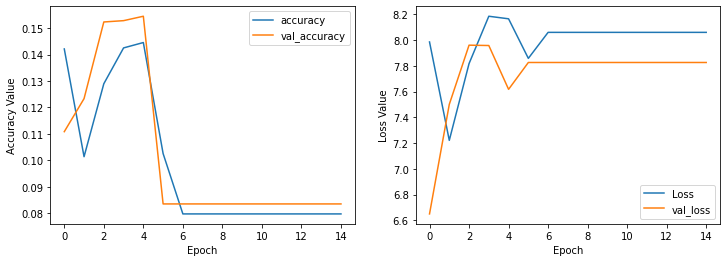

In [100]:
plot_history(history_three_layer_tanh_applied)

So we could see that the `tanh` activation function also does not have comparable results to `softmax` activation function. To have a final result in question 1 we can say that using the `softmax` activation function can get us to a good accuracy.

# Q2